### KELOMPOK 5

- MUHAMMAD FARID (2108108010028)
- NURUL UMMAH       (2108108010014)
- DITIA RAMADANI     (2108108010033)

#### MEMPREDIKSI DATASET DIABETES

Di dalam data diabetes diketahui terdapat 9 variabel yang terdiri dari 8 variabel independen dan 1 variabel dependen.

##### Variabel Independen (X) :

- Pregnancies : Number of times pregnant (mempresentasikan berapa kali wanita tersebut hamil selama hidupnya)
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (mempresentasikan konsentrasi glukosa plasma pada 2 jam dalam tes toleransi glukosa).
- Blood Pressure: Diastolic blood pressure (Tekanan darah adalah cara yang sangat terkenal untuk mengukur kesehatan jantung seseorang, ada juga ukuran tekanan darah yaitu diastolik dan sistolik. Dalam data ini, kita memiliki tekanan darah diastolik dalam (mm / Hg) ketika jantung rileks setelah kontraksi).
- Skin Thickness: Triceps skin fold thickness (nilai yang digunakan untuk memperkirakan lemak tubuh (mm) yang diukur pada lengan kanan setengah antara proses olecranon dari siku dan proses akromial skapula).
- Insulin: 2-Hour serum insulin (tingkat insulin 2 jam insulin serum dalam satuan mu U/ml)
- BMI: Body mass index (Indeks Massa Tubuh (berat dalam kg / (tinggi dalam meter kuadrat), dan merupakan indikator kesehatan seseorang).
- Diabetes Pedigree Function: Diabetes pedigree function (indikator riwayat diabetes dalam keluarga)
- Age: umur wanita suku indian pima (years)

##### Variabel Dependen (Y) :

- Outcome: Class variable (0 or 1), 0 untuk tidak mengidap diabetes, dan 1 mengidap diabetes.

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import datasets
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
data.shape

(768, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.duplicated().sum()

0

Tidak ada data duplikat pada dataset.

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Tidak ada missing value pada dataset.

In [11]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 : tidak diabetes, 1 : diabetes

Pada dataset, ada 500 orang tidak menderita diabetes dan 268 orang menderita diabetes.

#### Menganalisis data

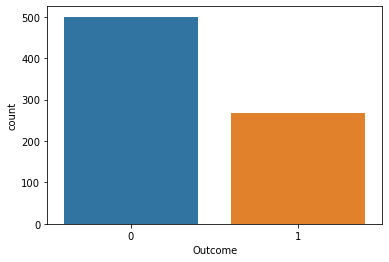

In [12]:
sns.countplot(data['Outcome'])
plt.show()

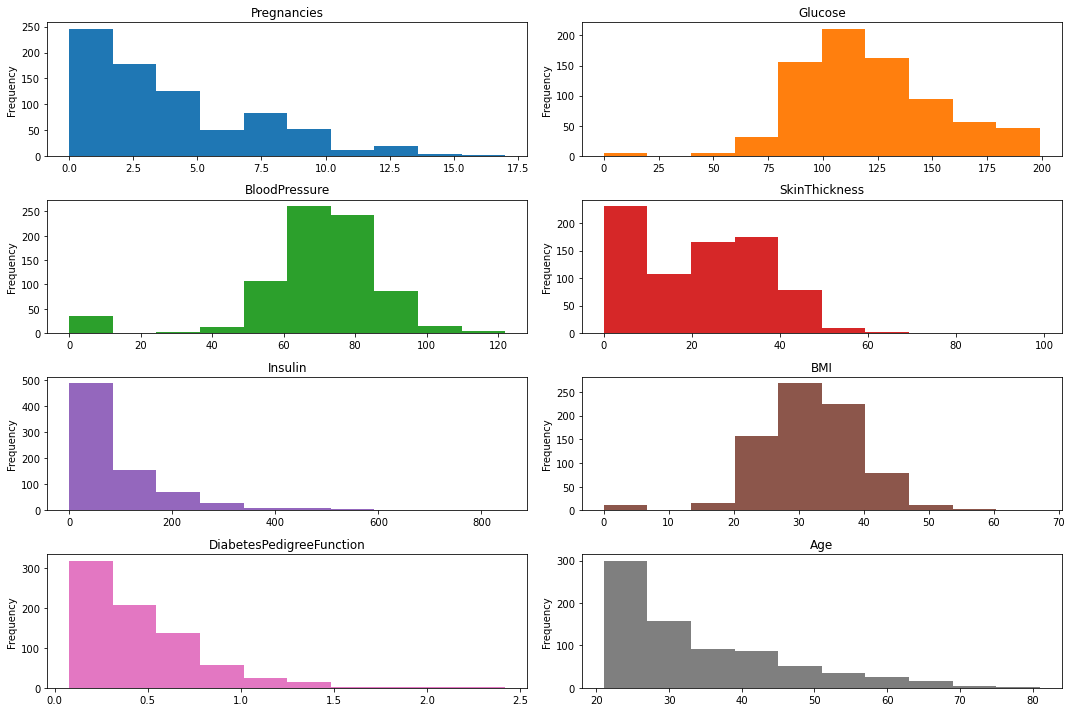

In [13]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = data.drop('Outcome', axis = 1).columns
for col in columns:
    data[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.tight_layout()
plt.show()

In [14]:
def mean_target(var):
    """
    A function that will return the mean values for 'var' column depending on whether the person
    is diabetic or not
    """
    return pd.DataFrame(data.groupby('Outcome').mean()[var])

In [15]:
def distplot(col_name):
    """
    A function that will plot the distribution of column 'col_name' for diabetic and non-diabetic people separately
    """
    plt.figure()
    ax = sns.distplot(data[col_name][data.Outcome == 1], color ="red", rug = True)
    sns.distplot(data[col_name][data.Outcome == 0], color ="lightblue",rug = True)
    plt.legend(['Diabetes', 'Tidak Diabetes'])

##### Pregnancies

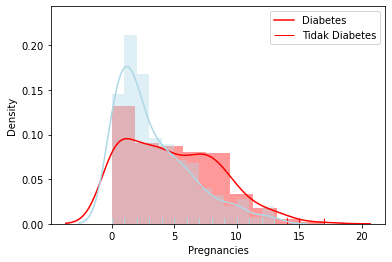

In [16]:
distplot('Pregnancies')

In [17]:
mean_target('Pregnancies')

,Pregnancies
Outcome,
0,3.298000
1,4.865672


Dapat dilihat bahwa jumlah kehamilan tinggi untuk penderita diabetes.

##### Insulin

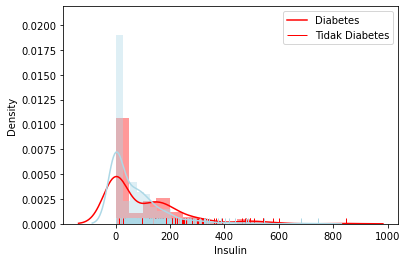

In [18]:
distplot('Insulin')

In [19]:
mean_target('Insulin')

,Insulin
Outcome,
0,68.792000
1,100.335821


Orang yang menderita diabetes cenderung memproduksi lebih banyak insulin.

##### Blood Pressure

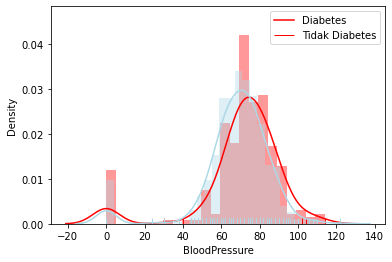

In [20]:
distplot('BloodPressure')

In [21]:
mean_target('BloodPressure')

,BloodPressure
Outcome,
0,68.184000
1,70.824627


Rata-rata tekanan darah pada penderita diabetes lebih besar dibandingkan dengan orang yang tidak menderita diabetes.

##### Glucose

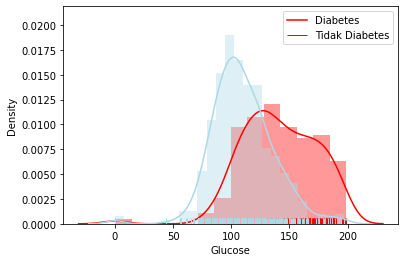

In [22]:
distplot('Glucose')

In [23]:
mean_target('Glucose')

,Glucose
Outcome,
0,109.980000
1,141.257463


Penderita diabetes cenderung memiliki glukosa lebih tinggi.

##### Skin Thickness

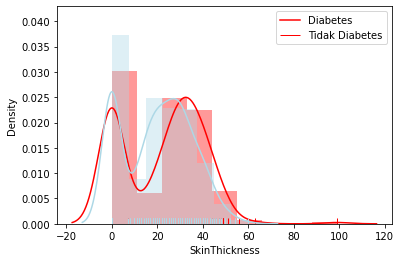

In [24]:
distplot('SkinThickness')

In [25]:
mean_target('SkinThickness')

,SkinThickness
Outcome,
0,19.664000
1,22.164179


Penderita diabetes mempunyai lemak tubuh lebih tinggi dibandingkan orang yang tidak menderita diabetes.

##### BMI

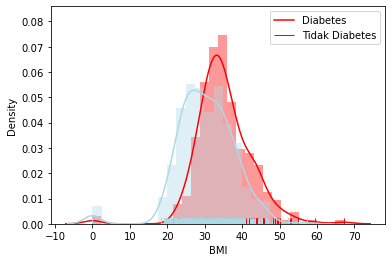

In [26]:
distplot('BMI')

In [27]:
mean_target('BMI')

,BMI
Outcome,
0,30.304200
1,35.142537


Penderita diabetes mempunyai BMI (indeks massa tubuh) lebih tinggi dibandingkan dengan orang yang tidak menderita diabetes.

##### Age

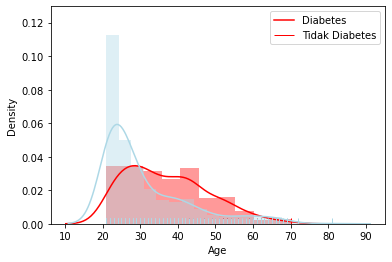

In [29]:
distplot('Age')

In [30]:
mean_target('Age')

,Age
Outcome,
0,31.190000
1,37.067164


Diabetes cenderung diderita oleh orang dengan usia lebih tua, namun tidak menutup kemungkinan orang dengan usia lebih muda tidak akan terkena diabetes.

##### Diabetes Pedigree Function

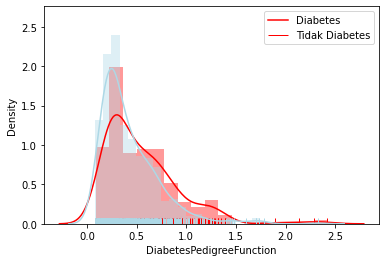

In [31]:
distplot('DiabetesPedigreeFunction')

In [32]:
mean_target('DiabetesPedigreeFunction')

,DiabetesPedigreeFunction
Outcome,
0,0.429734
1,0.550500


Orang dengan riwayat diabetes dalam keluarga berkemungkinan besar menderita diabetes.

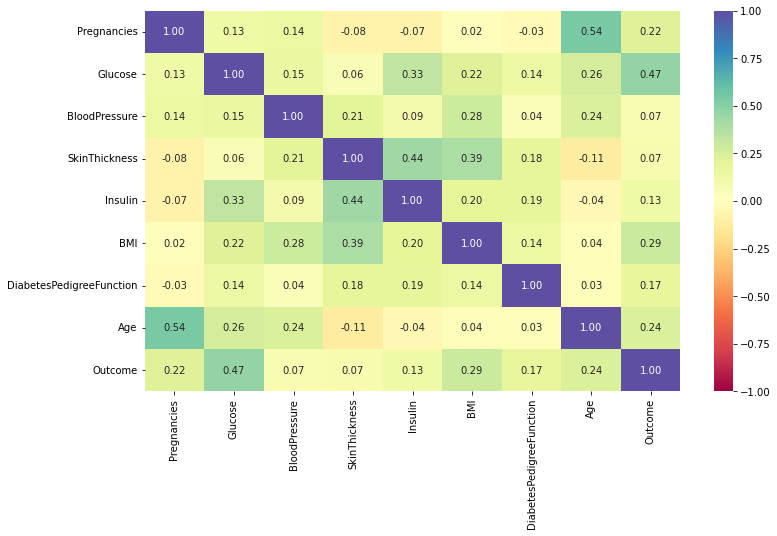

In [33]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Korelasi
- Ada korelasi negatif antara Age dengan Insulin yang menunjukkan semakin bertambah usia maka insulin yang dihasilkan akan semakin menurun.
- Ada korelasi negatif antara Age dengan SkinThickness yang menunjukkan semakin bertambah usia maka lemak tubuh akan semakin berkurang.
- Ada korelasi negatif antara Pregnancies dengan SkinThickness yang menunjukkan semakin banyak kehamilan maka lemak tubuh akan semakin berkurang.
- Ada korelasi negatif antara Pregnancies dengan Insulin yang menunjukkan semakin banyak kehamilan maka insulin yang dihasilkan akan semakin menurun.
- Ada korelasi negatif antara Pregnancies dengan DiabetesPredigeeFunction yang menunjukkan semakin banyak kehamilan maka indikator riwayat diabetes dalam keluarga semakin berkurang.
- Variabel yang lain berkorelasi positif, artinya jika satu variabel mengalami peningkatan maka variabel lain juga akan mengalami peningkatan.

#### Data Preparation untuk Membangun Model

In [34]:
# membagi data menjadi training dan testing
from sklearn.model_selection import train_test_split
features = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[features]
Y = data["Outcome"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.23, random_state=0)

In [35]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Shape of Training set :  (591, 8)
Shape of test set :  (177, 8)
Percentage of classes in training set:
0    0.639594
1    0.360406
Name: Outcome, dtype: float64
Percentage of classes in test set:
0    0.689266
1    0.310734
Name: Outcome, dtype: float64


In [36]:
print(X_train.shape)

(591, 8)


In [37]:
print(Y_train.shape)

(591,)


In [38]:
print(X_test.shape)

(177, 8)


In [39]:
print(Y_test.shape)

(177,)


#### Membuat Model Regresi Logistik

In [40]:
from sklearn.linear_model import LogisticRegression

# membangun model 
LogisticRegr = LogisticRegression()
LogisticRegr = LogisticRegr.fit(X_train, Y_train)

In [41]:
# memprediksi output dari 10 elemen test set
LogisticRegr.predict(X_test[0:10])

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [42]:
# memprediksi keseluruhan test set
prediction = LogisticRegr.predict(X_test)
prediction

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0], dtype=int64)

In [43]:
# keakuratan model dengan regresi logistik
score_lg = LogisticRegr.score(X_test, Y_test)
print("Accuracy:", score_lg)

Accuracy: 0.8135593220338984


Model regresi logistik untuk memprediksi test set memberikan keakuratan sebesar 81,36%.

In [44]:
# membangun confusion matrix
from sklearn.metrics import confusion_matrix
Y_pred_lg = LogisticRegr.predict(X_test)
cm_lg = confusion_matrix(Y_test, Y_pred_lg)
print(cm_lg)

[[110  12]
 [ 21  34]]


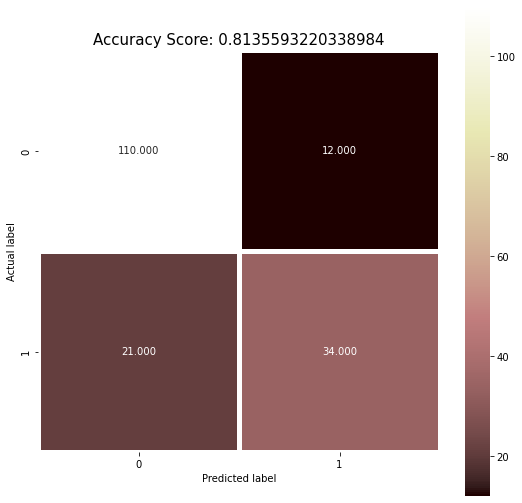

In [45]:
#menampilkan confusion matrix dalam heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm_lg, annot=True, fmt='.3f', linewidths= 5, square= True, cmap='pink');
plt.ylabel("Actual label");
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_lg)
plt.title(all_sample_title, size = 15);

1 : diabetes, 0 : tidak diabetes

Jika dilihat dari confusion matrix di atas maka dapat diketahui
bahwa 
- True Positive = 110 pasien diprediksi tidak menderita diabetes dan ternyata benar tidak menderita diabetes
- False Positive = 12 pasien diprediksi menderita diabetes dan ternyata tidak menderita diabetes
- True Negative = 34 pasien diprediksi menderita diabetes dan ternyata benar menderita diabetes
- False Negative = 21 pasien diprediksi tidak menderita diabetes dan ternyata menderita diabetes

In [46]:
# mengevaluasi model dengan Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_lg))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       122
           1       0.74      0.62      0.67        55

    accuracy                           0.81       177
   macro avg       0.79      0.76      0.77       177
weighted avg       0.81      0.81      0.81       177



Dari hasil evaluasi model dengan regresi logistik dapat diketahui bahwa pengujian dilakukan dengan cara membagi 768 data menjadi 592 data (data training 77% dan data testing 23%) . Dari 177 data testing, terdapat 144 data testing yang diklasifikasikan secara benar dan 33 data testing yang diklasifikasikan secara salah, oleh karena itu tingkat akurasi diperoleh sebesar 81%.

In [47]:
# memeriksa nilai prediksi
LogisticRegr.predict([[6,148,72,35,0,33.6,0.627,50]])

array([1], dtype=int64)

Jika seseorang telah mengalami kehamilan sebanyak 6 kali dengan glukosa 148, tekanan darah 72, lemak tubuh 35, tingkat insulin 0, BMI 33,6, indikator riwayat diabetes dalam keluarga sebesar 0,627, dan usia 50 tahun, maka diprediksi dia menderita diabetes.

#### Membuat Model Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

# membangun model
NaiveBayes = GaussianNB().fit(X_train, Y_train) 

In [49]:
Y_pred_nb = NaiveBayes.predict(X_test)
Y_pred_nb

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

# keakuratan model dengan Naive Bayes
score_nb = accuracy_score(Y_test, Y_pred_nb) 
print("Accuracy:", score_nb)

Accuracy: 0.7796610169491526


Model prediksi dengan Naive Bayes memberikan keakuratan sebesar 77,97%.

In [51]:
# membangun confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(Y_test, Y_pred_nb)
print(cm_nb)

[[106  16]
 [ 23  32]]


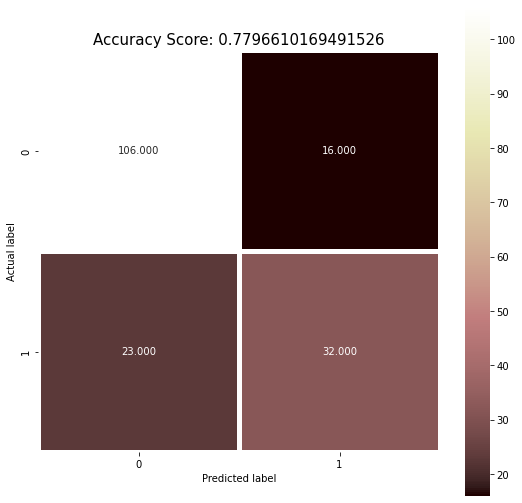

In [52]:
#menampilkan confusion matrix dalam heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm_nb, annot=True, fmt='.3f', linewidths= 5, square= True, cmap='pink');
plt.ylabel("Actual label");
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_nb)
plt.title(all_sample_title, size = 15);

1 : diabetes, 0 : tidak diabetes

Jika dilihat dari confusion matrix di atas maka dapat diketahui
bahwa 
- True Positive = 106 pasien diprediksi tidak menderita diabetes dan ternyata benar tidak menderita diabetes
- False Positive = 16 pasien diprediksi menderita diabetes dan ternyata tidak menderita diabetes
- True Negative = 32 pasien diprediksi menderita diabetes dan ternyata benar menderita diabetes
- False Negative = 23 pasien diprediksi tidak menderita diabetes dan ternyata menderita diabetes

In [53]:
# mengevaluasi model dengan Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       122
           1       0.67      0.58      0.62        55

    accuracy                           0.78       177
   macro avg       0.74      0.73      0.73       177
weighted avg       0.77      0.78      0.78       177



Dari hasil evaluasi model dengan Naive Bayes dapat diketahui bahwa pengujian dilakukan dengan cara membagi 768 data menjadi 592 data (data training 77% dan data testing 23%) . Dari 177 data testing, terdapat 138 data testing yang diklasifikasikan secara benar dan 39 data testing yang diklasifikasikan secara salah, oleh karena itu tingkat akurasi diperoleh sebesar 78%.

In [54]:
# memeriksa nilai prediksi
NaiveBayes.predict([[6,148,72,35,0,33.6,0.627,50]])

array([1], dtype=int64)

Jika seseorang telah mengalami kehamilan sebanyak 6 kali dengan glukosa 148, tekanan darah 72, lemak tubuh 35, tingkat insulin 0, BMI 33,6, indikator riwayat diabetes dalam keluarga sebesar 0,627, dan usia 50 tahun, maka diprediksi dia menderita diabetes.

#### Membangun Model Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

# membangun model
dtree = DecisionTreeClassifier(criterion="gini", max_depth=3)
dtree = dtree.fit(X_train, Y_train)

In [56]:
# memprediksi test set
Y_pred_dtree = dtree.predict(X_test)
Y_pred_dtree

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score

# keakuratan model dengan Naive Bayes
score_dtree = accuracy_score(Y_test, Y_pred_dtree) 
print("Accuracy:", score_dtree)

Accuracy: 0.7344632768361582


Model prediksi dengan Decision Tree memberikan keakuratan sebesar 73,45%.

In [58]:
# membangun confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtree = confusion_matrix(Y_test, Y_pred_dtree)
print(cm_dtree)

[[104  18]
 [ 29  26]]


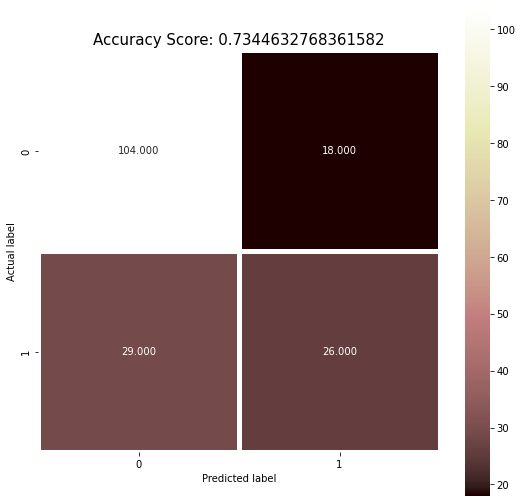

In [59]:
#menampilkan confusion matrix dalam heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm_dtree, annot=True, fmt='.3f', linewidths= 5, square= True, cmap='pink');
plt.ylabel("Actual label");
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_dtree)
plt.title(all_sample_title, size = 15);

1 : diabetes, 0 : tidak diabetes

Jika dilihat dari confusion matrix di atas maka dapat diketahui
bahwa 
- True Positive = 104 pasien diprediksi tidak menderita diabetes dan ternyata benar tidak menderita diabetes
- False Positive = 18 pasien diprediksi menderita diabetes dan ternyata tidak menderita diabetes
- True Negative = 26 pasien diprediksi menderita diabetes dan ternyata benar menderita diabetes
- False Negative = 29 pasien diprediksi tidak menderita diabetes dan ternyata menderita diabetes

In [60]:
# mengevaluasi model dengan Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_dtree))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       122
           1       0.59      0.47      0.53        55

    accuracy                           0.73       177
   macro avg       0.69      0.66      0.67       177
weighted avg       0.72      0.73      0.73       177



Dari hasil evaluasi model dengan regresi logistik dapat diketahui bahwa pengujian dilakukan dengan cara membagi 768 data menjadi 592 data (data training 77% dan data testing 23%) . Dari 177 data testing, terdapat 130 data testing yang diklasifikasikan secara benar dan 47 data testing yang diklasifikasikan secara salah, oleh karena itu tingkat akurasi diperoleh sebesar 73%.

In [61]:
# memeriksa nilai prediksi
dtree.predict([[6,148,72,35,0,33.6,0.627,50]])

array([1], dtype=int64)

Jika seseorang telah mengalami kehamilan sebanyak 6 kali dengan glukosa 148, tekanan darah 72, lemak tubuh 35, tingkat insulin 0, BMI 33,6, indikator riwayat diabetes dalam keluarga sebesar 0,627, dan usia 50 tahun, maka diprediksi dia menderita diabetes.

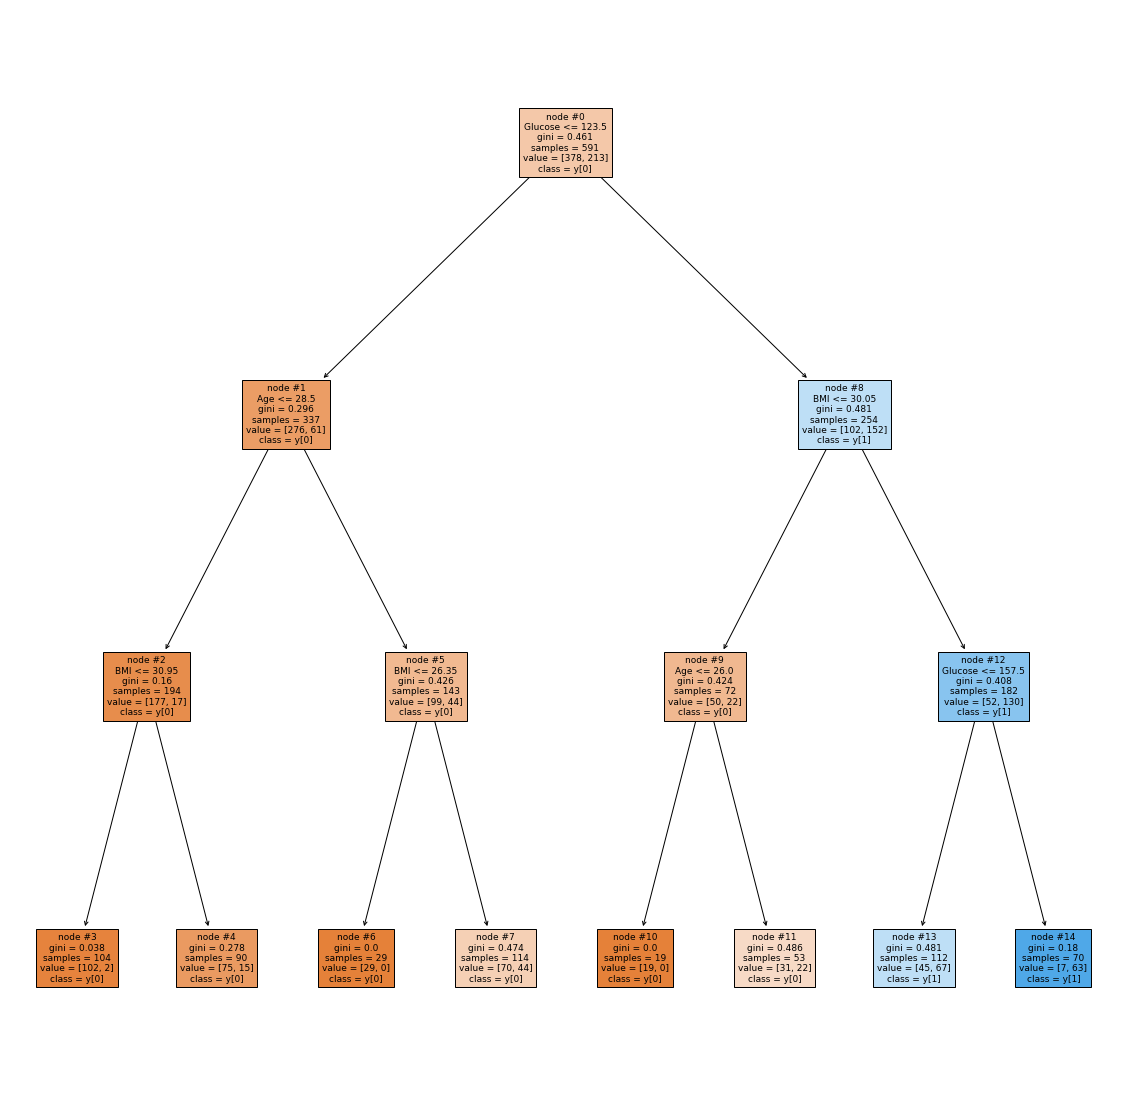

In [63]:
# memvisualisasikan decision tree
plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(dtree,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

#### Kesimpulan

- Model prediksi dengan regresi logistik memberikan keakuratan sebesar 81,36% 
- Model prediksi dengan naive bayes memberikan keakuratan sebesar 77,97%.
- Model prediksi dengan decision tree memberikan keakuratan sebesar 73,45%.

Tidak ada perbedaan jauh nilai keakuratan model-model tersebut. Namun, model prediksi dengan regresi logistik memberikan keakuratan sedikit lebih baik dibandingkan dengan naive bayes dan decision tree.